In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [6]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    def update_state_value(V, episodes, return_sum, return_count):
        first_appear = dict()
        for t, e in enumerate(episodes):
            s = e[0]
            first_appear[s] = t
        r = .0
        for t in range(len(episodes) - 1, -1, -1):
            e = episodes[t]
            cnt_s = e[0]
            cnt_r = e[2]
            r = r * discount_factor + cnt_r
            if first_appear[cnt_s] == t:
                returns_count[cnt_s] += 1
                returns_sum[cnt_s] += r
                V[cnt_s] = return_sum[cnt_s] / return_count[cnt_s]

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    for _ in range(num_episodes):
        obs = env.reset()
        episodes = []
        while True:
            action = policy(obs)
            next_state, reward, done, _ = env.step(action)
            episodes.append((obs, action, reward))
            obs = next_state
            if done:
                break
        update_state_value(V, episodes, returns_sum, returns_count)
            
    # Implement this!
    return V    

In [7]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

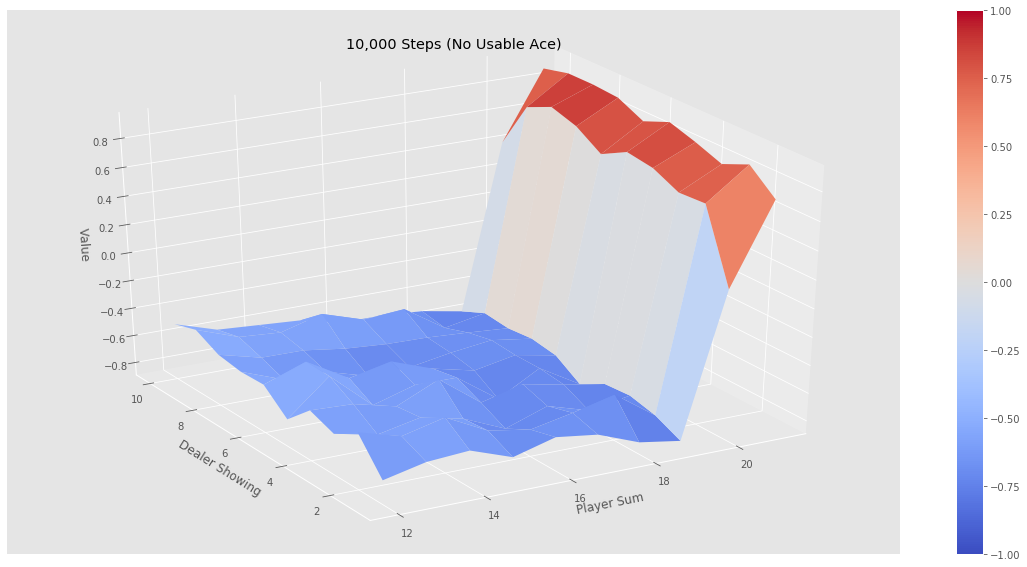

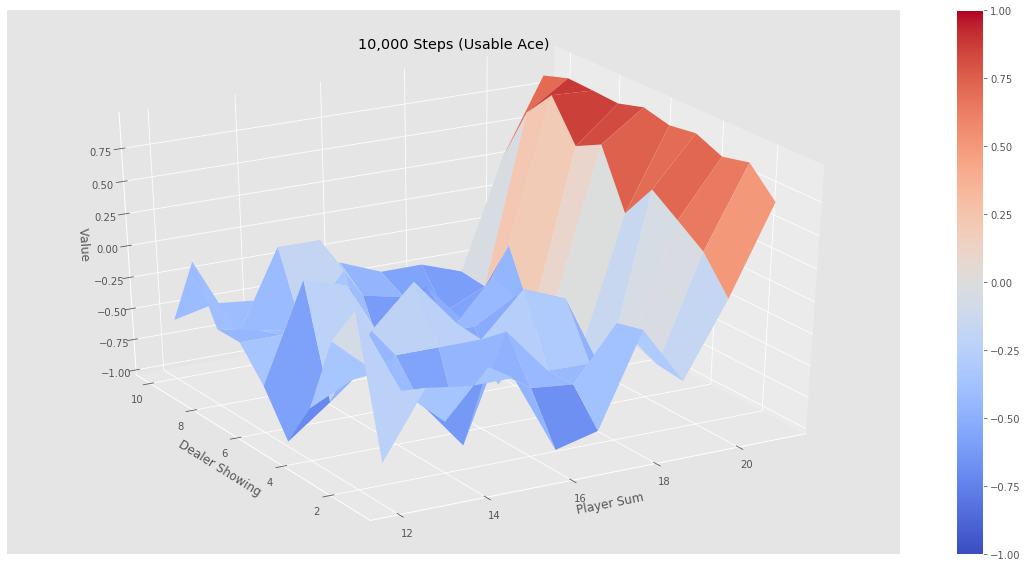

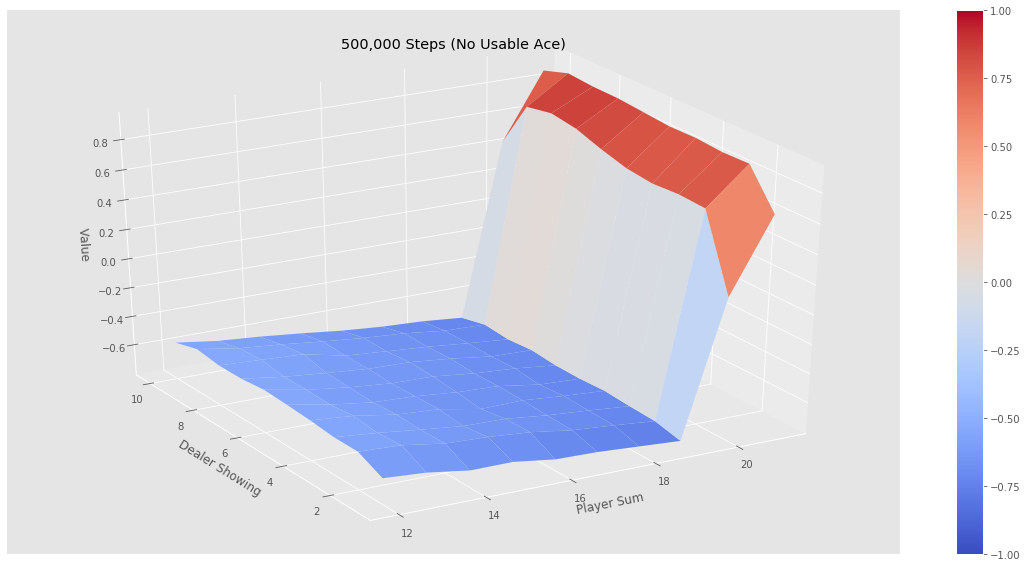

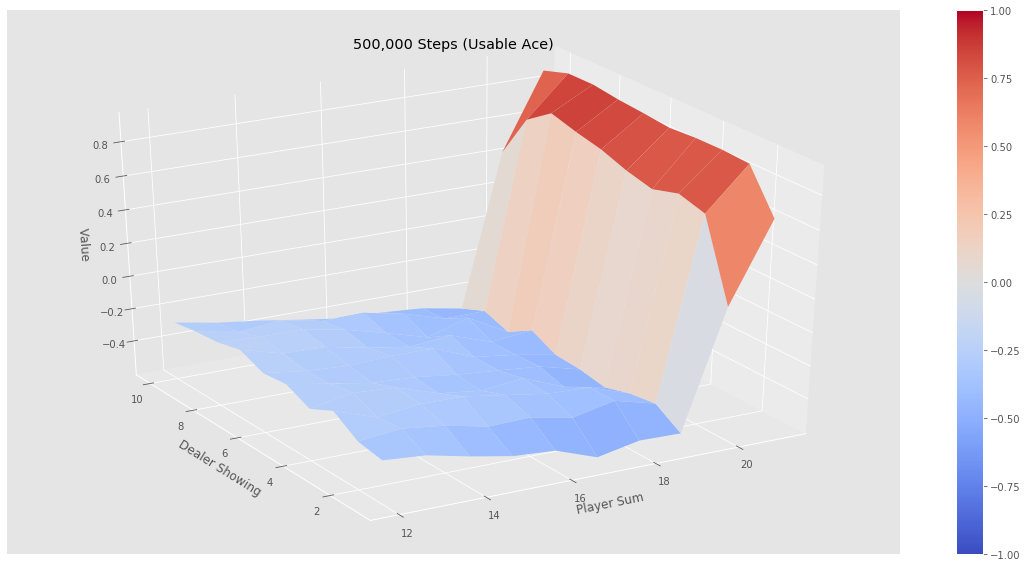

In [8]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")